In [ ]:
## 제6장. 머신러닝
## 제9절. 나이브베이즈 분류
# 나이브베이지는 데이터가 각 클래스에 속할 특정 확률을 계산하는 조건부 확률 기반의 분류방법이다.
# 나이브는 번역하면 '단순한'이라는 의미이다. 나이브베이즈 분휴 기법이 예측한 특징을 상호 독립적이라는 가정하에
# 확률 계산을 단순화하고 모든 변수가 동등하다는 특징이 비롯되었다.
# 베이즈는 베이지안 통계를 기반으로 입력특징이 클래스 전체의 확률 분포 대비 특정 클래스에 속할 확률을 정리하였다는 점에서 비롯되었다.

In [ ]:
### 1. 가우시안
# (1) 베이즈 정리
# 베이즈 정리는 두 확률 변수의 사전 확률과 사후 확률 사이의 관계를 나타내는 정리이다.
# 사건 A,B가 있을 때 사건 B가 일어난 것을 전제로 한 사건A의 조건부 확률을 구하는 것이다.
# 하지만 현재 가지고 있는 정보는 사건 A가 일어난 것을 전제로 한 사건 B의 조건부 확률과 A의 확률, B의 확률뿐이다.
# 이때, 원래 구하고자 했던것을 다음과 같이 구할 수 있다는것이 베이즈 정리이다.

In [ ]:
# (2) 나이브베이즈 분휴
# 나이브베이즈 분휴는 하나의 속성값을 기준으로 다른 속성이 독립적이라 전제했을 때 해당 속성값이 클래스 분류에 미치는 영향을 측정한다.
# 속성값에 대해 다른 속성이 독립적이라는 가정은 클래스 조건 독립성이라 한다.
# n개의 특징에 대한 결합 조건부 분포는 특징들의 분포를 곱한것으로 표현할 수 있다.

# 라플라스 스무딩은 나이브베이즈 분류를 보정하는 기법이다.
# 특징의 출현 횟수의 초깃값을 보정한다.
# 발견되지 않은 특징의 출현 빈도 초깃값을 1로 설정하고 초깃값을 1부터 시작하는 것이다.
# 이는 특히 다중 분류 모델에서 특징이 없는 값으로 인해 0을 곱해 발생하는 문제를 극복하게 한다.

# 장점
# 간단하고 빠르다.
# 노이즈와 결측치에 강하다.
# 예측을 위한 추정확률을 쉽게 얻을 수 있다.
# 단점
# 모든 측징이 동등하게 중요하며 독입이라고 가정하기 때문에 가정이 잘못된 경우들이 종종 있다.
# 가정된 확률이 예측된 클래스보다 덜 신뢰할만하다.

In [ ]:
## 나이브베이지 분류 추천 상황
# ㄱ. 데이터가 많지 않을때
# 과거의 빈도를 보여주는 데이터가 많지 않거나 자주 일어나지 않는 사건이어서 빈도주의적 추론의 사용이 마땅치 않을 때 나이브베이즈 분류를 추천한다.
# 이때는 빈도가 적기 때문에 전통적 추정의 신뢰도가 크게 떨어지기 때문이다.
# ㄴ. 추정의 목적이 미래 예측일때
# 베이지안 접근은 하나의 추정치를 고집하는것이 아니라 계속해서 값을 수정하면서 좀더 현설적인 추정치를 찾아가는 기법이다.
# 띠라서 예측의 목적에 잘 맞는다.

In [2]:
# (1) scikit-learn의 GaussianNB
import pandas as pd
sky = pd.read_csv("C:/Users/A202112006/Desktop/py/data/Skyserver.csv")
sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [3]:
sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

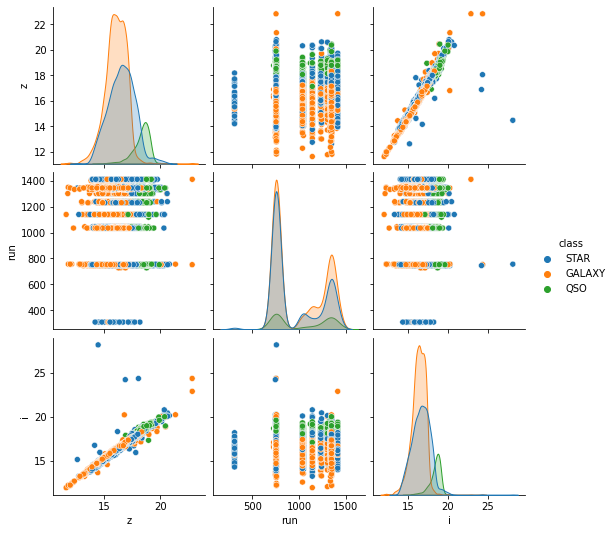

In [4]:
import seaborn as sns
sns.pairplot(hue='class', data =sky[['z', 'run', 'i', 'class']])

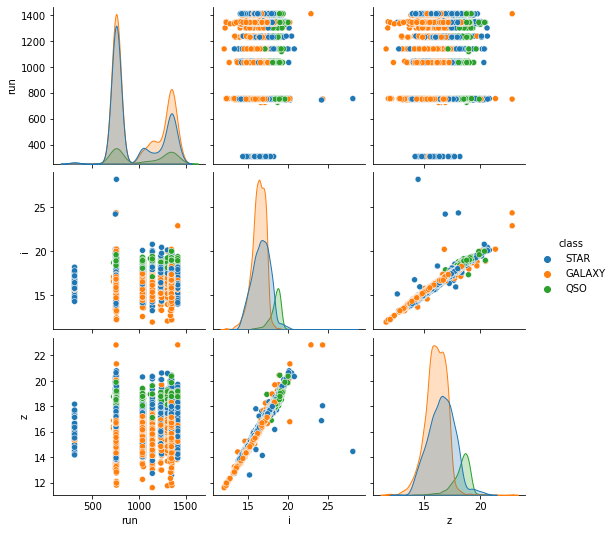

In [5]:
import seaborn as sns
sns.pairplot(hue='class', data =sky[['class', 'run', 'i', 'z']])

In [6]:
import numpy as np
features = list(sky.columns)
features.remove('class')
X = sky[features]
y = sky['class']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 2023, stratify =y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7000, 17) (7000,)
(3000, 17) (3000,)


In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred = gnb.fit(x_train, y_train).predict(x_test)
print("Accuracy Score : ", gnb.score(x_test, y_test))

Accuracy Score :  0.794


In [8]:
gnb.predict_proba(x_test)[[0 , 13 , 68 ]]

array([[0.81990524, 0.04800726, 0.1320875 ],
       [0.82547545, 0.04769079, 0.12683376],
       [0.83056266, 0.0479608 , 0.12147654]])

In [9]:
gnb.predict(x_test)[[0 , 13 , 68 ]]

array(['GALAXY', 'GALAXY', 'GALAXY'], dtype='<U6')

In [10]:
from sklearn.metrics import classification_report
pred=gnb.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.90      0.74      0.81      1246

    accuracy                           0.79      3000
   macro avg       0.55      0.57      0.55      3000
weighted avg       0.74      0.79      0.76      3000



c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2. 베르누이
(1) scikit-learn의 BernoulliNB
* 베르누이 나이브 베이즈 분류분성(이항분류)

In [21]:
import pandas as pd
spam = pd.read_csv('C:/Users/A202112006/Desktop/py/data/spam.csv', encoding ='utf-8')
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
spam.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [23]:
spam = spam[['v1', 'v2']]
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ? b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [25]:
import numpy as np
spam['label'] = np.where(spam['v1'] == 'spam', 1, 0)
spam

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ? b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [26]:
X= spam['v2']
y = spam['label']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 2023, stratify =y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3900,) (3900,)
(1672,) (1672,)


In [30]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(binary =True)
x_traincv = cv.fit_transform(x_train)
x_traincv.shape

(3900, 7223)

In [31]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
print(cv.inverse_transform(encoded_input[[0]]))

[array(['04', '08715203694', '10', '2003', '31', '40533', '800', 'account',
       'call', 'code', 'expires', 'for', 'identifier', 'points',
       'private', 'redeemed', 'shows', 'statement', 'un', 'your'],
      dtype='<U32')]


In [34]:
print (cv.get_feature_names()[1000 :1010], end ='')

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [35]:
print (cv.get_feature_names())


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [36]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_traincv, y_train)

BernoulliNB()

In [37]:
x_testcv = cv.transform(x_test)
pred = bnb.predict(x_testcv)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print("Accuracy Score : ", acc)

Accuracy Score :  0.9772727272727273


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       1.00      0.83      0.91       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



### 2. 다항 나이브베이즈
(1) scikit-learn의 MultinomialNB
* 다항식 모델을 위한 나이브베이즈

In [ ]:
# pip install keras
# !pip install tensorflow

In [44]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17464789/17464789 [==============================] - 2s 0us/step


In [45]:
print(X_train.shape)
print(X_test.shape)

(25000,)
(25000,)


In [49]:
import pandas as pd

word_to_index = imdb.get_word_index()
index_to_word = {}

for key, value in word_to_index.items():
    index_to_word[value+3] = key
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

train_reviews = []
for X in X_train:
    tmp =' '.join([index_to_word[index] for index in X])
    train_reviews.append(tmp)

test_reviews = []
for X in X_test:
    tmp =' '.join([index_to_word[index] for index in X])
    test_reviews.append(tmp)

train = pd.concat([pd.DataFrame(train_reviews), pd.DataFrame(y_train)], axis =1)
train.columns = ['reviews', 'label']
train['reviews'] = train['reviews'].str[6:]

test = pd.concat([pd.DataFrame(test_reviews), pd.DataFrame(y_test)], axis =1)
test.columns = ['reviews', 'label']
train['reviews'] = train['reviews'].str[6:]

print("<<<<<<<<< Train Dataset for MNB >>>>>>>>>", train)
print("<<<<<<<<< Test Dataset for MNB >>>>>>>>>", test)

<<<<<<<<< Train Dataset for MNB >>>>>>>>>                                                  reviews  label
0      ilm was just brilliant casting location scener...      1
1      ir big boobs bad music and a giant safety pin ...      0
2      as to be one of the worst films of the 1990s w...      0
3      ots excel at storytelling the traditional sort...      1
4      mistake of my life br br i picked this movie u...      0
...                                                  ...    ...
24995  s a racist movie but worthy of study and enjoy...      1
24996  ugosi plays a doctor who will do anything to k...      0
24997  ar away galaxy is a planet called ceta it's na...      0
24998  grees had me hooked i looked forward to it com...      1
24999  ig fan of the original film it's hard to watch...      0

[25000 rows x 2 columns]
<<<<<<<<< Test Dataset for MNB >>>>>>>>>                                                  reviews  label
0      <sos> please give this one a miss br br kristy...   

In [50]:
x_train, x_test = train['reviews'].values, test['reviews'].values
y_train, y_test = train['label'].values, test['label'].values
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=False)
x_traincv = cv.fit_transform(x_train)
x_traincv.shape

(25000, 76521)

In [54]:
print (cv.inverse_transform(x_traincv)[0 ])

['ilm' 'was' 'just' 'brilliant' 'casting' 'location' 'scenery' 'story'
 'direction' 'everyone' 'really' 'suited' 'the' 'part' 'they' 'played'
 'and' 'you' 'could' 'imagine' 'being' 'there' 'robert' 'redford' 'is'
 'an' 'amazing' 'actor' 'now' 'same' 'director' 'norman' 'father' 'came'
 'from' 'scottish' 'island' 'as' 'myself' 'so' 'loved' 'fact' 'real'
 'connection' 'with' 'this' 'film' 'witty' 'remarks' 'throughout' 'were'
 'great' 'it' 'much' 'that' 'bought' 'soon' 'released' 'for' 'retail'
 'would' 'recommend' 'to' 'watch' 'fly' 'fishing' 'cried' 'at' 'end' 'sad'
 'know' 'what' 'say' 'if' 'cry' 'must' 'have' 'been' 'good' 'definitely'
 'also' 'congratulations' 'two' 'little' 'boy' 'of' 'paul' 'children'
 'are' 'often' 'left' 'out' 'praising' 'list' 'think' 'because' 'stars'
 'play' 'them' 'all' 'grown' 'up' 'such' 'big' 'profile' 'whole' 'but'
 'these' 'should' 'be' 'praised' 'done' 'don' 'lovely' 'true' 'someone'
 'life' 'after' 'shared' 'us']


In [55]:
print (cv.get_feature_names()[-10 :])

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [56]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_traincv, y_train)

MultinomialNB()

In [30]:
from sklearn.metrics import accuracy_score, classification_report
x_testcv = cv.transform(x_test)
pred = mnb.predict(x_testcv)
acc = accuracy_score(y_test, pred)
print("Accuracy Score : ", acc)

Accuracy Score :  0.81932


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     12500
           1       0.85      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000

